# Arquivo criado para classificar base de dados com foco na profissão do investidor

## Instalacao bibliotecas necessarias

In [1]:
# !pip install catboost
# !pip install xgboost

## 1. Extracao da base de dados

In [92]:
# Imports e leitura
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

In [93]:
df = pd.read_csv("./data/profissoes_density_populacional.csv", sep=";")
df.drop(columns=["Unnamed: 0","UF","UF do Investidor","investidores_por_100k"], inplace=True)

In [94]:
df['Macrogrupo_Profissao'].value_counts()


Macrogrupo_Profissao
Agricultura e Meio Rural              27
Arte, Cultura e Comunicação           27
Economia, Negócios e Administração    27
Educação, Ciência e Pesquisa          27
Engenharia, Tecnologia e Produção     27
Esporte                               27
Nao CLTs                              27
Outros                                27
Saúde e Bem-estar                     27
Serviços Gerais e Técnicos            27
Serviços Públicos e Segurança         27
Transporte e Logística                27
Name: count, dtype: int64

In [95]:
df.head()

,Macrogrupo_Profissao,quantidade_investidores,População (2022)
0,Agricultura e Meio Rural,1405,829780
1,Agricultura e Meio Rural,5272,3125254
2,Agricultura e Meio Rural,3560,3952262
3,Agricultura e Meio Rural,925,774268
4,Agricultura e Meio Rural,30948,14659023


In [96]:
alvo = 'Macrogrupo_Profissao'

In [97]:
len(df.Macrogrupo_Profissao.unique())

12

## 2. Transformacao dos dados

In [98]:
# Encoding de variáveis categóricas (transformado em numeros inteiros)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=[alvo])
y = df[alvo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% Treino e 30%Teste

In [99]:
y

0       0
1       0
2       0
3       0
4       0
       ..
319    11
320    11
321    11
322    11
323    11
Name: Macrogrupo_Profissao, Length: 324, dtype: int64

## 3. Treinamento e analise de modelos

### 3.1 Treinamento

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print("Treinamento com arvore de decisao finalizado")
print("Acurácia Decision Tree:", accuracy_score(y_test, pred_dt))

# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=3)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Treinamento com arvore de decisao aleatoria finalizado")
print("Acurácia Random Forest:", accuracy_score(y_test, pred_rf))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',n_estimators=100,max_depth=3,learning_rate=0.2, tree_method='gpu_hist')
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print("Treinamento com XGBOOST finalizado")
print("Acurácia XGBoost:", accuracy_score(y_test, pred_xgb))

# CatBoost
cb = CatBoostClassifier(verbose=0, task_type="GPU")
cb.fit(X_train, y_train)
pred_cb = cb.predict(X_test)
print("Treinamento com CATBOOST finalizado")

# Avaliação
print("Acurácia Decision Tree:", accuracy_score(y_test, pred_dt))
print("Acurácia Random Forest:", accuracy_score(y_test, pred_rf))
print("Acurácia XGBoost:", accuracy_score(y_test, pred_xgb))
print("Acurácia CatBoost:", accuracy_score(y_test, pred_cb))

#Será que 90% é bom? Vamos analisar com mais detalhes os resultados a seguir.

Treinamento com arvore de decisao finalizado
Acurácia Decision Tree: 0.15306122448979592
Treinamento com arvore de decisao aleatoria finalizado
Acurácia Random Forest: 0.12244897959183673


/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:11:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:11:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [15:11:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self

Treinamento com XGBOOST finalizado
Acurácia XGBoost: 0.22448979591836735
Treinamento com CATBOOST finalizado
Acurácia Decision Tree: 0.15306122448979592
Acurácia Random Forest: 0.12244897959183673
Acurácia XGBoost: 0.22448979591836735
Acurácia CatBoost: 0.2653061224489796


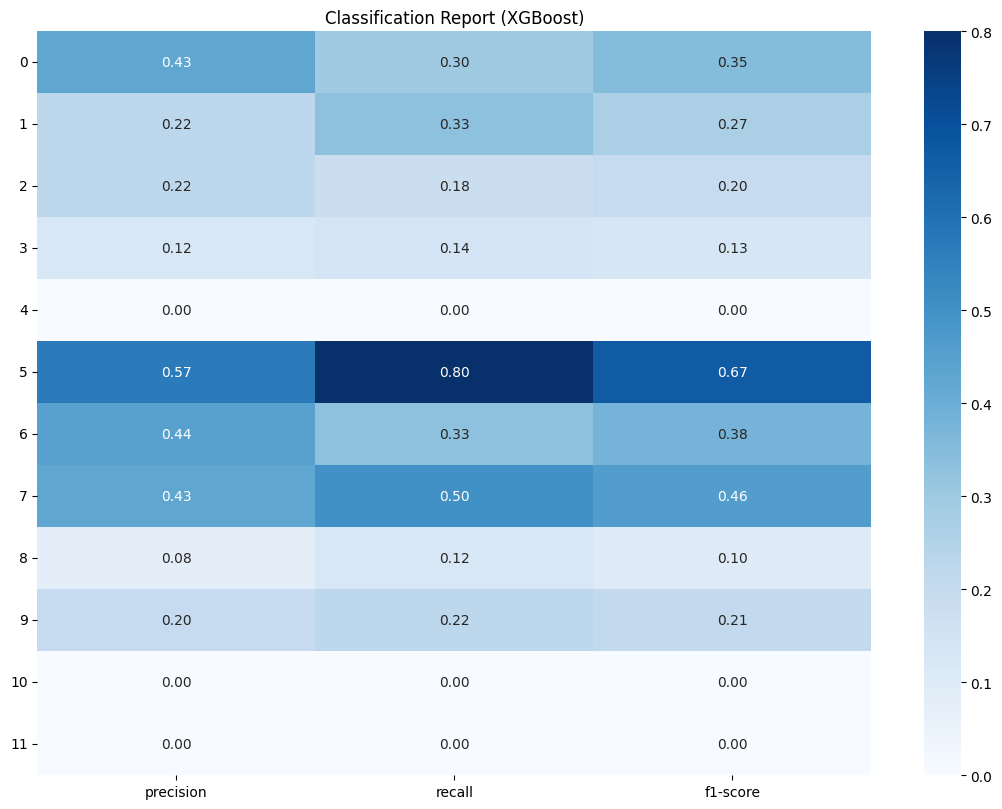

In [101]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gera o relatório como dicionário
report_dict = classification_report(
    y_test, 
    pred_xgb, 
    output_dict=True, 
    target_names=df['Macrogrupo_Profissao'].unique().astype(str)
)

# Converte para DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Cria figura e heatmap
plt.figure(figsize=(11, 8.2))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, fmt=".2f", cmap="Blues")
plt.title("Classification Report (XGBoost)")
plt.yticks(rotation=0)

# Salva a imagem PNG
plt.tight_layout()
plt.savefig("./images/classification_report_xgb_human_density_vs_work.png", dpi=300)
plt.show()


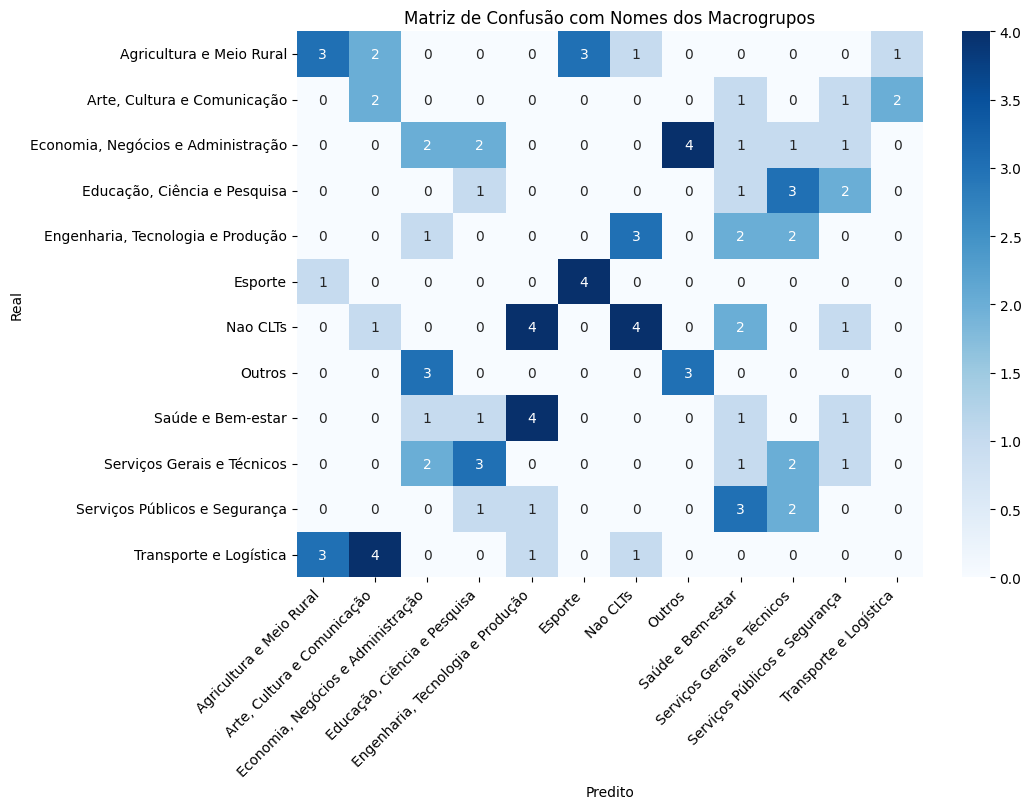

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

macrogrupos_nomes = label_encoders['Macrogrupo_Profissao'].inverse_transform(sorted(set(y_test)))

cm = confusion_matrix(y_test, pred_xgb)

plt.figure(figsize=(11, 8.2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=macrogrupos_nomes,
            yticklabels=macrogrupos_nomes)

plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão com Nomes dos Macrogrupos')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("./images/classification_report_xgb_density_vs_work_confusion_matrix.png", dpi=300)
plt.show()


In [30]:
# Pegando os nomes das colunas geradas pelo OneHotEncoder
ohe = ct.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Pegando as colunas que não foram transformadas
non_categorical_cols = [col for col in X.columns if col not in categorical_cols]

# Unindo todas
feature_names = list(ohe_feature_names) + non_categorical_cols


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt, 
    feature_names=feature_names,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


NameError: name 'ct' is not defined

## Analise de modelos

/tmp/ipykernel_357639/3281023940.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


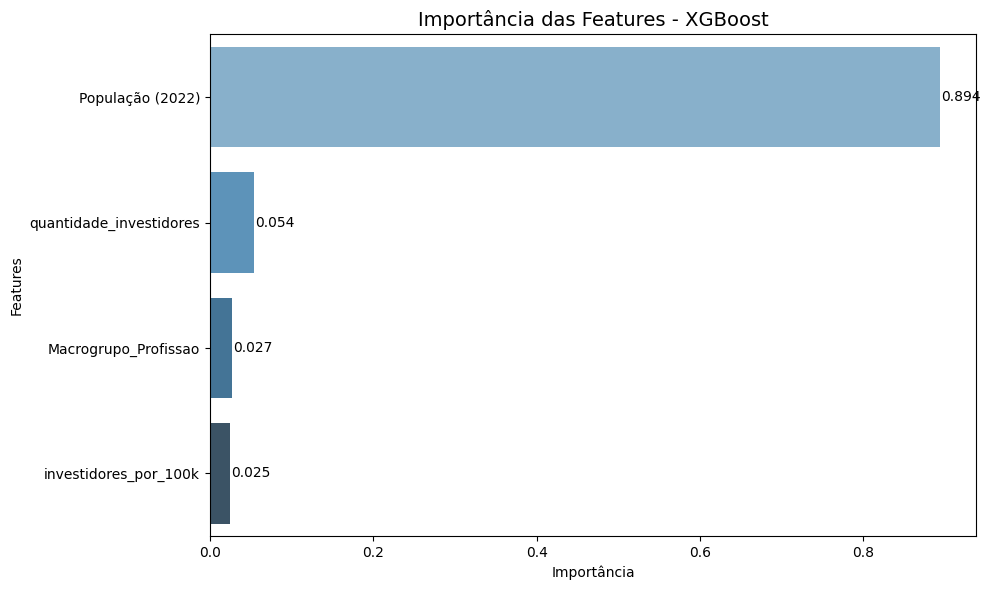

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importância das características
importances = xgb.feature_importances_
features = X.columns

# Cria um DataFrame ordenado
df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=df_importance,
    palette='Blues_d'
)

plt.title('Importância das Features - XGBoost', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Features')

# Adicionando os valores nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 0.001,                # posição X
        p.get_y() + p.get_height() / 2, # posição Y centralizado na barra
        f'{width:.3f}',                # valor formatado com 3 casas decimais
        va='center'
    )

plt.tight_layout()
plt.show()


In [32]:
df_importance

,Feature,Importance
2,População (2022),0.893581
1,quantidade_investidores,0.054145
0,Macrogrupo_Profissao,0.027261
3,investidores_por_100k,0.025013


## Z - TESTES Com codigo original

In [ ]:
df = pd.read_parquet("./data/to_classify/sample_data_cluster.parquet") 

In [48]:
# Encoding de variáveis categóricas (transformado em numeros inteiros)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Operou 12 Meses'])
y = df['Operou 12 Meses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% Treino e 30%Teste

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print("Treinamento com arvore de decisao finalizado")

# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=3)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Treinamento com arvore de decisao aleatoria finalizado")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',n_estimators=100,max_depth=3,learning_rate=0.2, tree_method='gpu_hist')
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print("Treinamento com XGBOOST finalizado")

# CatBoost
# cb = CatBoostClassifier(verbose=0, task_type="GPU")
# cb.fit(X_train, y_train)
# pred_cb = cb.predict(X_test)
# print("Treinamento com CATBOOST finalizado")

# Avaliação
print("Acurácia Decision Tree:", accuracy_score(y_test, pred_dt))
print("Acurácia Random Forest:", accuracy_score(y_test, pred_rf))
print("Acurácia XGBoost:", accuracy_score(y_test, pred_xgb))
# print("Acurácia CatBoost:", accuracy_score(y_test, pred_cb))

#Será que 90% é bom? Vamos analisar com mais detalhes os resultados a seguir.

Treinamento com arvore de decisao finalizado
Treinamento com arvore de decisao aleatoria finalizado


/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:52:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:52:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Treinamento com XGBOOST finalizado
Acurácia Decision Tree: 0.9303977137262257
Acurácia Random Forest: 0.9303977137262257
Acurácia XGBoost: 0.9303977137262257


/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [15:52:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


/tmp/ipykernel_2113303/510692250.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<module 'matplotlib.pyplot' from '/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

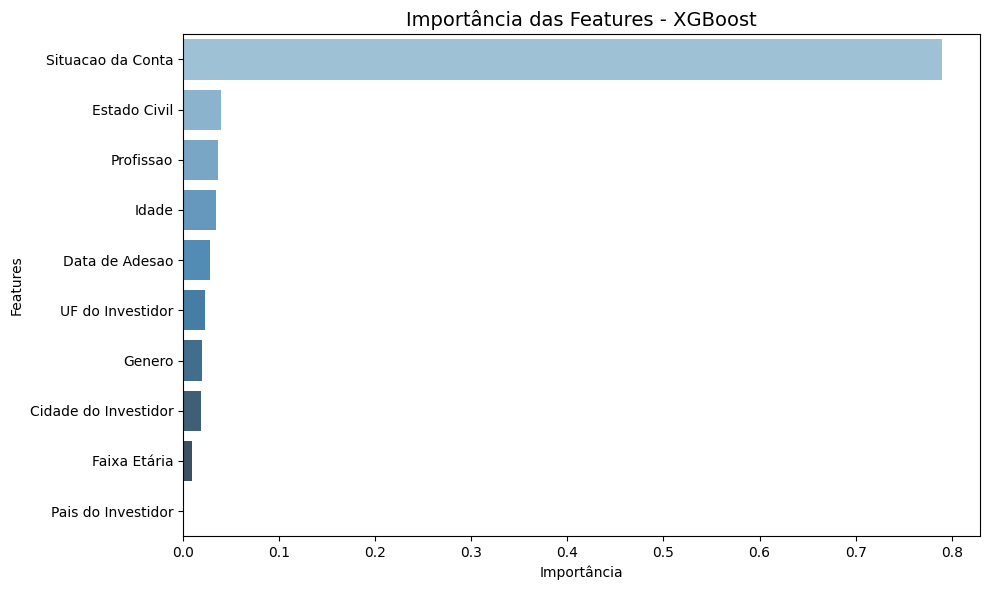

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importância das características - XGBoost (você colocou 'Random Forest' no título, mas está usando xgb)
importances = xgb.feature_importances_
features = X.columns

# Cria um DataFrame para facilitar a ordenação
df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Ordena de maior para menor
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Plotando
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=df_importance,
    palette='Blues_d'
)
plt.title('Importância das Features - XGBoost', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Features')
plt.tight_layout()
plt


## Outros

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate

# Encoding de variáveis categóricas (transformado em numeros inteiros)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=[alvo])
y = df[alvo]


# 3. Cross-validation com Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
modelo = XGBClassifier(eval_metric='logloss',n_estimators=100,max_depth=3,learning_rate=0.2, device='cuda')

scores = cross_val_score(modelo, X, y, cv=skf)

# 4. Resultados
print("Acurácias por fold:", scores)
print("Média da acurácia:", scores.mean())
print("Desvio padrão:", scores.std())


scoring = ['accuracy', 'f1_macro', 'recall_macro', 'precision_macro']
resultados = cross_validate(modelo, X, y, cv=skf, scoring=scoring)

print("Acurácia média:", resultados['test_accuracy'].mean())
print("F1-score médio:", resultados['test_f1_macro'].mean())
print("Recall médio:", resultados['test_recall_macro'].mean())
print("Precision médio:", resultados['test_precision_macro'].mean())